# Predicting fraudulent transactions

In [84]:
#imporing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Fraud.csv")

In [4]:
df.head(8)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0


In [5]:
len(df)

6362620

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [42]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

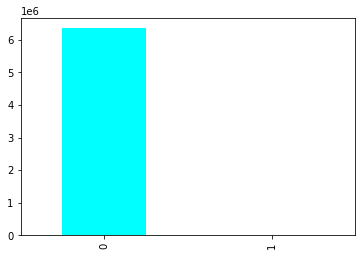

In [43]:
df["isFraud"].value_counts().plot(kind = "bar",color = ["cyan","blue"])

In [44]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [45]:
pd.crosstab(df.isFraud, df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

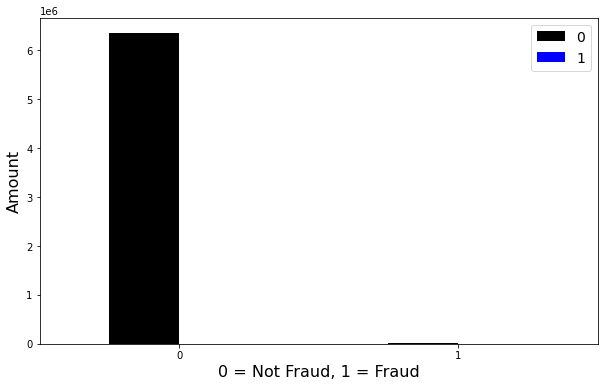

In [46]:
pd.crosstab(df.isFraud,df.isFlaggedFraud).plot(kind="bar",
                                               figsize = (10,6),
                                               color=["k","blue"])

plt.xlabel("0 = Not Fraud, 1 = Fraud",fontsize = 16)
plt.ylabel("Amount", fontsize = 16)
plt.legend(fontsize = 14)
plt.xticks(rotation = 0)

In [47]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [48]:
df.type[df.isFraud == 1]

2          TRANSFER
3          CASH_OUT
251        TRANSFER
252        CASH_OUT
680        TRANSFER
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 8213, dtype: object

In [49]:
df.type[df.isFraud == 1].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [50]:
df.tail(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [51]:
df.newbalanceDest[df.isFraud==1].value_counts()

0.00           4091
10000000.00      53
1064995.85        2
127905.82         2
1165187.89        2
               ... 
3098931.52        1
143526.32         1
1532241.85        1
495991.64         1
7360101.63        1
Name: newbalanceDest, Length: 4067, dtype: int64

In [52]:
df.amount[df.isFraud==1].value_counts()

10000000.00    287
0.00            16
1165187.89       4
429257.45        4
181.00           2
              ... 
149668.66        1
7316255.05       1
222048.71        1
9585040.37       1
234377.29        1
Name: amount, Length: 3977, dtype: int64

In [53]:
pd.crosstab(df.type, df.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [3]:
df_cpy = df.copy()

In [10]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Find the columns which contains string dtype

for label,content in df_cpy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

type
nameOrig
nameDest


In [5]:
#Fill Numerical missing value first

for label, content in df_cpy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [6]:
# check which column have categorical data

for label,content in df_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

type
nameOrig
nameDest


In [7]:
# Trun categorical variables into numbers and fill missing
for label, content in df_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #turn categories into number and add +1
        df_cpy[label] = pd.Categorical(content).codes + 1

In [24]:
df_cpy.type.value_counts()

2    2237500
4    2151495
1    1399284
5     532909
3      41432
Name: type, dtype: int64

In [25]:
df_cpy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,757870,170136.0,160296.36,1662095,0.0,0.0,0,0
1,1,4,1864.28,2188999,21249.0,19384.72,1733925,0.0,0.0,0,0
2,1,5,181.00,1002157,181.0,0.00,439686,0.0,0.0,1,0
3,1,2,181.00,5828263,181.0,0.00,391697,21182.0,0.0,1,0
4,1,4,11668.14,3445982,41554.0,29885.86,828920,0.0,0.0,0,0


In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:>

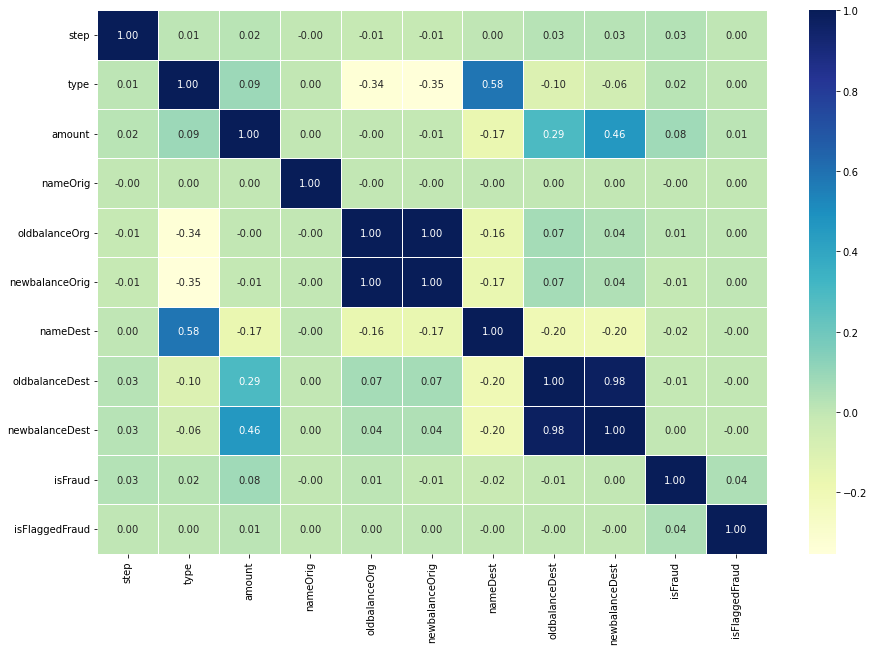

In [27]:
corr_mat = df_cpy.corr()

plt.subplots(figsize = (15,10))
sns.heatmap(corr_mat,
            annot = True,
            linewidth = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")

In [8]:
new_df = df_cpy.copy()

In [9]:
#normalization

def normalization(x):
    return ((x - np.min(x)) / (max(x)-min(x)))

new_df = new_df.apply(normalization)

In [30]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,0.75,0.000106,0.119287,0.002855,0.003233,0.610534,0.000000,0.0,0.0,0.0
1,0.0,0.75,0.000020,0.344545,0.000357,0.000391,0.636919,0.000000,0.0,0.0,0.0
2,0.0,1.00,0.000002,0.157738,0.000003,0.000000,0.161509,0.000000,0.0,1.0,0.0
3,0.0,0.25,0.000002,0.917359,0.000003,0.000000,0.143881,0.000059,0.0,1.0,0.0
4,0.0,0.75,0.000126,0.542392,0.000697,0.000603,0.304485,0.000000,0.0,0.0,0.0


In [31]:
#spliting the data

X = new_df.drop(["isFraud"],axis = 1)
y = new_df["isFraud"]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [33]:
print("X_train shape :",X_train.shape)
print("X_test shape  :",X_test.shape)
print("Y_train shape :",y_train.shape)
print("Y_test shape  :",y_test.shape)

X_train shape : (4453834, 10)
X_test shape  : (1908786, 10)
Y_train shape : (4453834,)
Y_test shape  : (1908786,)


In [75]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train,X_train).fit()

/home/robin/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                 8.603e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:09:23   Log-Likelihood:             8.9073e+06
No. Observations:             4453834   AIC:                        -1.781e+07
Df Residuals:                 4453823   BIC:                        -1.781e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0043   4.83e-05     90.

In [78]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [79]:
# Calculating Vif value|
vif_cal(input_data=new_df, dependent_col="isFraud")

,Var,Vif
5,newbalanceOrig,495.71
4,oldbalanceOrg,490.76
8,newbalanceDest,83.80
7,oldbalanceDest,72.34
1,type,4.45
2,amount,4.08
6,nameDest,3.30
0,step,2.77
3,nameOrig,2.76
9,isFlaggedFraud,1.00


In [80]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('oldbalanceOrg', 1)

/tmp/ipykernel_450276/2361587852.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('oldbalanceOrg', 1)


In [81]:
# Create a third fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [82]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7558.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:37:56   Log-Likelihood:             8.5478e+06
No. Observations:             4453834   AIC:                        -1.710e+07
Df Residuals:                 4453824   BIC:                        -1.710e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0018   5.18e-05    -34.

In [83]:
X_train = X_train.drop(["nameOrig"],axis = 1)

In [84]:
# Calculating Vif value
vif_cal(input_data=new_df.drop(["nameOrig","oldbalanceOrg"], axis=1), dependent_col="isFraud")

,Var,Vif
6,newbalanceDest,82.71
5,oldbalanceDest,71.20
2,amount,4.06
1,type,4.00
4,nameDest,3.25
0,step,2.21
3,newbalanceOrig,1.16
7,isFlaggedFraud,1.00


In [85]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [87]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8502.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:43:59   Log-Likelihood:             8.5478e+06
No. Observations:             4453834   AIC:                        -1.710e+07
Df Residuals:                 4453825   BIC:                        -1.710e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0018   4.28e-05    -42.

In [10]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = new_df[(new_df['isFraud']==0)] 
df_minority = new_df[(new_df['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 531177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [11]:
df_upsampled["isFraud"].value_counts()

0.0    6354407
1.0     531177
Name: isFraud, dtype: int64

In [15]:
#create two different dataframe of majority and minority class 
und_df_majority = new_df[(new_df['isFraud']==0)] 
und_df_minority = new_df[(new_df['isFraud']==1)] 
# upsample minority class
df_majority_undsampled = resample(df_majority, 
                                 n_samples= 3531177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with undersampled minority class
df_undersampled = pd.concat([df_majority_undsampled, und_df_minority])

In [16]:
df_undersampled["isFraud"].value_counts()

0.0    3531177
1.0       8213
Name: isFraud, dtype: int64

In [17]:
#create two different dataframe of majority and minority class 
df_majority = df_undersampled[(df_undersampled['isFraud']==0)] 
df_minority = df_undersampled[(df_undersampled['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1208823, # to match majority class
                                 random_state=24)  # reproducible results
# Combine majority class with upsampled minority class
new_df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [18]:
new_df_upsampled["isFraud"].value_counts()

0.0    3531177
1.0    1208823
Name: isFraud, dtype: int64

In [19]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [69]:
new_df_upsampled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030572,0.098383,0.25,0.047335,0.672788,0.073440,0.0,0.144728,0.000192,0.012478,1.0,0.0
4341938,0.413747,1.00,0.004799,0.090085,0.007446,0.0,0.195166,0.000000,0.000000,1.0,0.0
6021372,0.629380,1.00,0.015743,0.237431,0.024425,0.0,0.027038,0.000000,0.000000,1.0,0.0
6207689,0.789757,0.25,0.003118,0.869492,0.004838,0.0,0.068140,0.000188,0.000998,1.0,0.0
6294303,0.901617,1.00,0.020967,0.779834,0.032531,0.0,0.007942,0.000000,0.000000,1.0,0.0


In [70]:
len(new_df_upsampled)

5240000

In [45]:
len(df)

6362620

In [20]:
#spliting the data

new_X = new_df_upsampled.drop(["isFraud"],axis = 1)
new_y = new_df_upsampled["isFraud"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 21)

In [22]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

upsampled_lm_1 = sm.OLS(y_train,X_train).fit()

/home/robin/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
print(upsampled_lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 2.577e+05
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:46:26   Log-Likelihood:            -9.9860e+05
No. Observations:             3318000   AIC:                         1.997e+06
Df Residuals:                 3317989   BIC:                         1.997e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0914      0.001    167.

In [75]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [76]:
# Calculating Vif value|
vif_cal(input_data=new_df_upsampled, dependent_col="isFraud")

,Var,Vif
4,oldbalanceOrg,46.07
5,newbalanceOrig,34.78
8,newbalanceDest,26.92
7,oldbalanceDest,23.08
2,amount,12.19
1,type,3.51
0,step,2.69
3,nameOrig,2.69
6,nameDest,2.31
9,isFlaggedFraud,1.05


In [54]:
new_df_upsampled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030572,0.098383,0.25,0.047335,0.672788,0.073440,0.0,0.144728,0.000192,0.012478,1.0,0.0
4341938,0.413747,1.00,0.004799,0.090085,0.007446,0.0,0.195166,0.000000,0.000000,1.0,0.0
6021372,0.629380,1.00,0.015743,0.237431,0.024425,0.0,0.027038,0.000000,0.000000,1.0,0.0
6207689,0.789757,0.25,0.003118,0.869492,0.004838,0.0,0.068140,0.000188,0.000998,1.0,0.0
6294303,0.901617,1.00,0.020967,0.779834,0.032531,0.0,0.007942,0.000000,0.000000,1.0,0.0


In [77]:
# Calculating Vif value
vif_cal(input_data=new_df_upsampled.drop(["oldbalanceOrg"], axis=1), dependent_col="isFraud")

,Var,Vif
7,newbalanceDest,23.65
6,oldbalanceDest,21.26
1,type,3.47
0,step,2.68
3,nameOrig,2.68
2,amount,2.51
5,nameDest,2.30
4,newbalanceOrig,1.17
8,isFlaggedFraud,1.01


In [79]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('oldbalanceOrg', axis=1)

upsampled_lm_2 = sm.OLS(y_train,X_train).fit()

print(upsampled_lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 2.241e+05
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:40:43   Log-Likelihood:            -1.2294e+06
No. Observations:             3668000   AIC:                         2.459e+06
Df Residuals:                 3667990   BIC:                         2.459e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0487      0.001     91.

In [80]:
X_train.shape

(3668000, 10)

In [81]:
X_test.shape

(1572000, 10)

In [83]:
# Calculating Vif value
vif_cal(input_data=new_df_upsampled.drop(["oldbalanceDest","oldbalanceOrg"], axis=1), dependent_col="isFraud")

,Var,Vif
1,type,3.37
0,step,2.68
3,nameOrig,2.68
5,nameDest,2.27
2,amount,1.34
6,newbalanceDest,1.21
4,newbalanceOrig,1.11
7,isFlaggedFraud,1.01


In [86]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(["oldbalanceDest"],axis=1)


X_train = sm.add_constant(X_train)

upsampled_lm_3 = sm.OLS(y_train,X_train).fit()

print(upsampled_lm_3.summary())

/home/robin/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 2.521e+05
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:05:03   Log-Likelihood:            -1.2294e+06
No. Observations:             3668000   AIC:                         2.459e+06
Df Residuals:                 3667991   BIC:                         2.459e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0484      0.001     90.

In [24]:
#drop the highly correlated columns and spliting the data

X = new_df_upsampled.drop(["isFraud","oldbalanceDest","oldbalanceOrg"],axis = 1)
y = new_df_upsampled["isFraud"]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 21)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
models = {"Random Forest":RandomForestClassifier()}

#creating a function to fit models and scores

def fit_and_score(models, X_train,X_test,y_train,y_test):
    
    #random seed
    np.random.seed(21)
    
    model_score = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [29]:
model_score = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_score

{'Random Forest': 0.9999324894514768}

# Apply XGBoost

In [31]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)


In [33]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [68]:
#spliting the data

X = df_cpy.drop(["isFraud"],axis = 1)
y = df_cpy["isFraud"]

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 21)

In [75]:
#build model

xgb_model = XGBClassifier()

#fit the data
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
xgb_model.score(X_test,y_test)

0.9998056356238991

In [34]:
#create two different dataframe of majority and minority class 
und_df_majority = new_df[(new_df['isFraud']==0)] 
und_df_minority = new_df[(new_df['isFraud']==1)] 
# upsample minority class
df_majority_undsampled = resample(df_majority, 
                                 n_samples= 4531177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with undersampled minority class
df_undersampled = pd.concat([df_majority_undsampled, und_df_minority])

In [35]:
#create two different dataframe of majority and minority class 
df_majority = df_undersampled[(df_undersampled['isFraud']==0)] 
df_minority = df_undersampled[(df_undersampled['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1008823, # to match majority class
                                 random_state=24)  # reproducible results
# Combine majority class with upsampled minority class
new_df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [38]:
new_df_upsampled["isFraud"].value_counts()

0.0    4531177
1.0    1008823
Name: isFraud, dtype: int64

In [39]:
#spliting the data

new_X = new_df_upsampled.drop(["isFraud","oldbalanceOrg"],axis = 1)
new_y = new_df_upsampled["isFraud"]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 21)

In [41]:
#build model

xgb_model = XGBClassifier()

#fit the data
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
xgb_model.score(X_test,y_test)

0.9994831528279182

In [43]:
y_pred = xgb_model.predict(X_test)

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

<AxesSubplot:>

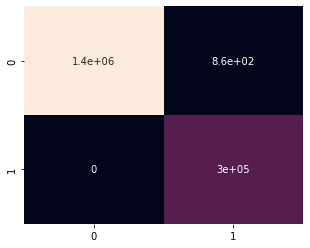

In [46]:
# Evaluate XGB model
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True,
            cbar = False,
            )

In [47]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc

y_pred_prob = xgb_model.predict_proba(X_test)

y_pred_prob[:10]

array([[1.4580488e-03, 9.9854195e-01],
       [9.9995667e-01, 4.3352469e-05],
       [9.9999702e-01, 2.9939442e-06],
       [9.9999917e-01, 8.3431138e-07],
       [2.4914742e-05, 9.9997509e-01],
       [9.9977791e-01, 2.2210611e-04],
       [4.9233437e-05, 9.9995077e-01],
       [7.2139502e-04, 9.9927860e-01],
       [9.9999911e-01, 8.9958667e-07],
       [9.9999094e-01, 9.0820768e-06]], dtype=float32)

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.999995160569341

In [50]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

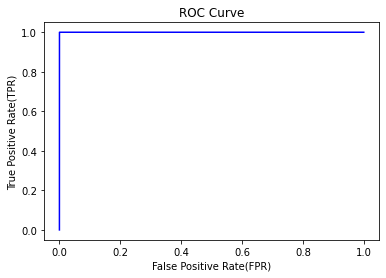

In [51]:
plt.plot(fpr,tpr,color = "blue",label = "ROC")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.show()

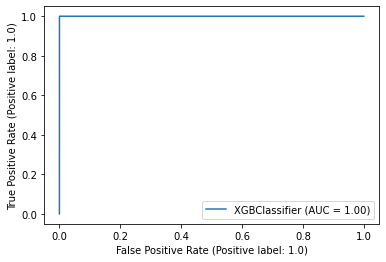

In [52]:
#using plot_roc_curve

plot_roc_curve(xgb_model, X_test,y_test)

In [55]:
#create two different dataframe of majority and minority class 
df_majority = new_df[(new_df['isFraud']==0)] 
df_minority = new_df[(new_df['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 731177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [56]:
df_upsampled["isFraud"].value_counts()

0.0    6354407
1.0     731177
Name: isFraud, dtype: int64

In [57]:
#spliting the data

new_X = df_upsampled.drop(["isFraud","oldbalanceOrg"],axis = 1)
new_y = df_upsampled["isFraud"]

In [58]:
X_train,X_test,y_train,y_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 21)

In [59]:
#build model

xgb_model = XGBClassifier()

#fit the data
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
xgb_model.score(X_test,y_test)

0.9892438922959096

In [61]:
y_pred = xgb_model.predict(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

In [77]:
#spliting the data

X = df_cpy.drop(["isFraud"],axis = 1)
y = df_cpy["isFraud"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 21)

In [78]:
#create a classifier with best hyperparameter

clf = LogisticRegression(C = 0.615848,
                         solver = "liblinear")

In [79]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.615848, solver='liblinear')

In [80]:
clf.score(X_test,y_test)

0.9991188116425833

In [81]:
#check coef
clf.coef_

array([[-3.24544656e-05, -3.67364929e-07, -5.47242543e-05,
        -8.12687204e-07,  6.89002077e-05, -7.45496096e-05,
        -9.19168716e-06,  6.52987329e-06, -7.50972645e-06,
         4.48694199e-10]])

In [82]:
# Match coeff of features to columns

feature_dict = dict(zip(df_cpy.columns, list(clf.coef_[0])))
feature_dict

{'step': -3.245446564675262e-05,
 'type': -3.673649292608795e-07,
 'amount': -5.4724254337365425e-05,
 'nameOrig': -8.126872037402e-07,
 'oldbalanceOrg': 6.890020773384692e-05,
 'newbalanceOrig': -7.45496095910168e-05,
 'nameDest': -9.191687155330772e-06,
 'oldbalanceDest': 6.529873294282275e-06,
 'newbalanceDest': -7.509726446311814e-06,
 'isFraud': 4.4869419863311343e-10}

<AxesSubplot:title={'center':'Feature importance'}>

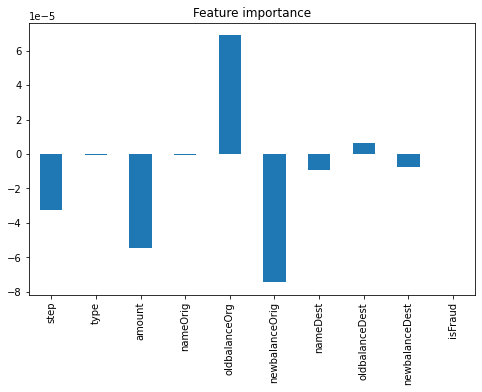

In [83]:
#Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Feature importance",
                      legend = False,
                      figsize = (8,5))